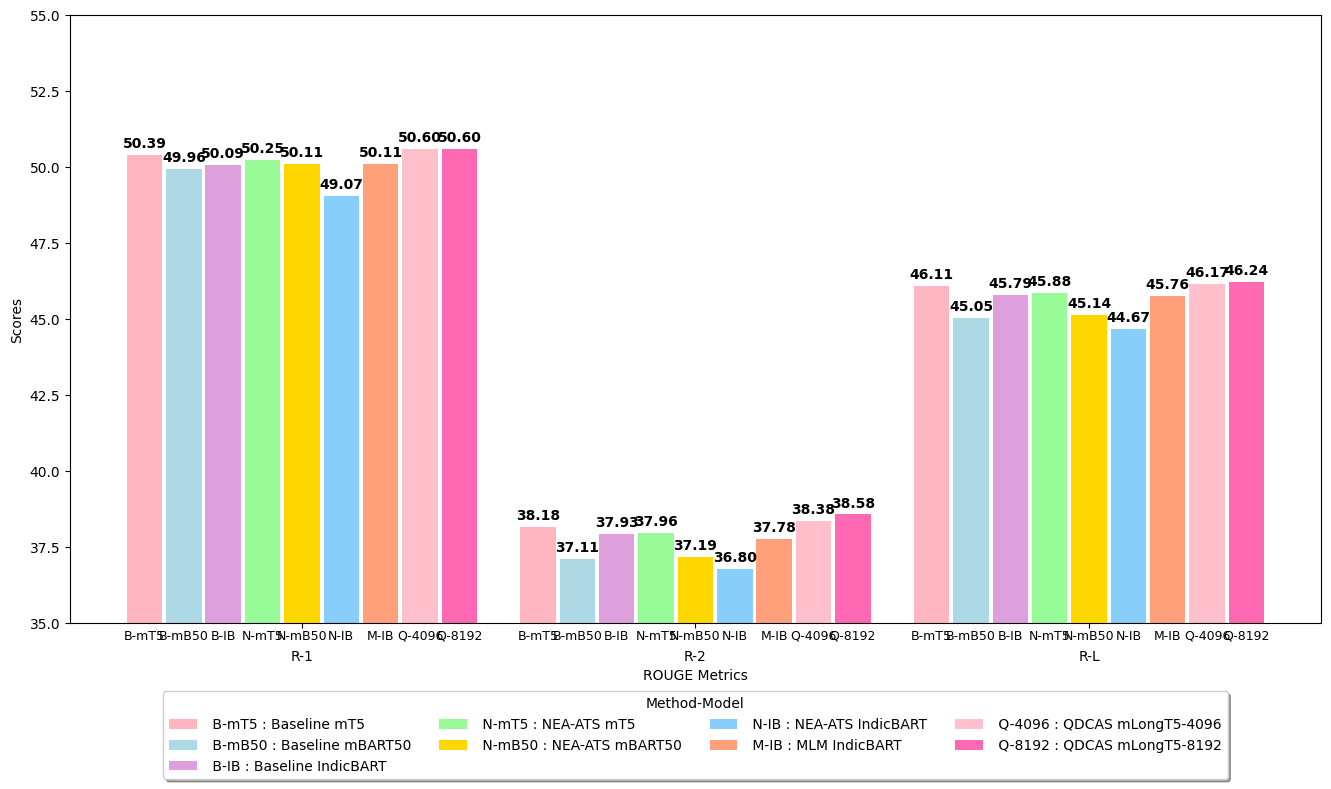

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the table
data_n = {
    "Method": ["Baseline", "Baseline", "Baseline", "NEA-ATS", "NEA-ATS", "NEA-ATS"],
    "Model": ["mT5", "mBART50", "IndicBART", "mT5", "mBART50", "IndicBART"],
    "Model-short": ['B-mT5', 'B-mB50', 'B-IB', 'N-mT5', 'N-mB50', 'N-IB'],
    "colors" : ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#98FB98', '#FFD700', '#87CEFA'],
    "R-1": [50.39, 49.96, 50.09, 50.25, 50.11, 49.07],
    "R-2": [38.18, 37.11, 37.93, 37.96, 37.19, 36.80],
    "R-L": [46.11, 45.05, 45.79, 45.88, 45.14, 44.67],
    "B-P": [79.2, 79.9, 79.2, 79.2, 79.8, 78.3],
    "B-R": [79.9, 80.0, 79.8, 79.9, 80.0, 79.7],
    "B-F1": [79.5, 79.9, 79.4, 79.5, 79.9, 78.9]
}

data_m = {
    "Method": ["Baseline", "Baseline", "Baseline", "NEA-ATS", "NEA-ATS", "NEA-ATS", "MLM"],
    "Model": ["mT5", "mBART50", "IndicBART", "mT5", "mBART50", "IndicBART", "IndicBART"],
    "Model-short": ['B-mT5', 'B-mB50', 'B-IB', 'N-mT5', 'N-mB50', 'N-IB', 'M-IB'],
    "colors" : ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#98FB98', '#FFD700', '#87CEFA', '#FFA07A'],
    "R-1": [50.39, 49.96, 50.09, 50.25, 50.11, 49.07, 50.11],
    "R-2": [38.18, 37.11, 37.93, 37.96, 37.19, 36.80, 37.78],
    "R-L": [46.11, 45.05, 45.79, 45.88, 45.14, 44.67, 45.76],
    "B-P": [79.2, 79.9, 79.2, 79.2, 79.8, 78.3, 79.4],
    "B-R": [79.9, 80.0, 79.8, 79.9, 80.0, 79.7, 79.8],
    "B-F1": [79.5, 79.9, 79.4, 79.5, 79.9, 78.9, 79.5]
}

data_q = {
    "Method": ["Baseline", "Baseline", "Baseline", "QDCAS", "QDCAS"],
    "Model": ["mT5", "mBART50", "IndicBART", "mLongT5-4096", "mLongT5-8192"],
    "Model-short": ['B-mT5', 'B-mB50', 'B-IB', 'Q-4096', 'Q-8192'],
    "colors" : ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#FFC0CB', '#FF69B4'],
    "R-1": [50.39, 49.96, 50.09, 50.60, 50.60],
    "R-2": [38.18, 37.11, 37.93, 38.38, 38.58],
    "R-L": [46.11, 45.05, 45.79, 46.17, 46.24],
    "B-P": [79.2, 79.9, 79.2, 79.6, 79.6],
    "B-R": [79.9, 80.0, 79.8, 80.4, 80.3],
    "B-F1": [79.5, 79.9, 79.4, 80.0, 79.9]
}


data_fin = {
    "Method": ["Baseline", "Baseline", "Baseline", "NEA-ATS", "NEA-ATS", "NEA-ATS", "MLM", "QDCAS", "QDCAS"],
    "Model": ["mT5", "mBART50", "IndicBART", "mT5", "mBART50", "IndicBART", "IndicBART", "mLongT5-4096", "mLongT5-8192"],
    "Model-short": ['B-mT5', 'B-mB50', 'B-IB', 'N-mT5', 'N-mB50', 'N-IB', 'M-IB', 'Q-4096', 'Q-8192'],
    "colors" : ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#98FB98', '#FFD700', '#87CEFA', '#FFA07A', '#FFC0CB', '#FF69B4'],
    "R-1": [50.39, 49.96, 50.09, 50.25, 50.11, 49.07, 50.11, 50.60, 50.60],
    "R-2": [38.18, 37.11, 37.93, 37.96, 37.19, 36.80, 37.78, 38.38, 38.58],
    "R-L": [46.11, 45.05, 45.79, 45.88, 45.14, 44.67, 45.76, 46.17, 46.24],
    "B-P": [79.2, 79.9, 79.2, 79.2, 79.8, 78.3, 79.4, 79.6, 79.6],
    "B-R": [79.9, 80.0, 79.8, 79.9, 80.0, 79.7, 79.8, 80.4, 80.3],
    "B-F1": [79.5, 79.9, 79.4, 79.5, 79.9, 78.9, 79.5, 80.0, 79.9]
}

# Create DataFrame
df = pd.DataFrame(data_fin)

def create_final_adjusted_bar_plot(metrics, custom_min=40, custom_max=60):
    # Number of groups and models/methods
    n_groups = len(metrics)
    models_methods = len(df)

    # Create plot
    fig, ax = plt.subplots(figsize=(13.5, 8))

    # Setting the positions and width for the bars
    total_width = 0.9
    single_width = total_width / models_methods
    bar_width = single_width * 0.9  # width of each bar
    group_spacing = 0.10  # further reduced space between groups of bars for each metric

    # Colors (light shades)
    
    # Iterate over all metrics
    for i, metric in enumerate(metrics):
        # Create an offset for each metric group, with reduced spacing for clear separation
        group_offset = (total_width + group_spacing) * i
        
        # Plot bars for each model-method combination within each metric group
        for j in range(models_methods):
            means = df.loc[j, metric]
            pos = j * single_width + group_offset
            bar = plt.bar(pos, means, bar_width, color=df.loc[j, "colors"], label=f' {df.loc[j, "Model-short"]} : {df.loc[j, "Method"]} {df.loc[j, "Model"]}' if i == 0 else "")
            # Add text annotation above each bar
            for rect in bar:
                height = rect.get_height()
                ax.annotate(f'{height:.2f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontweight='bold')
                # Add M1, M2, M3... labels below each bar for identification
                ax.text(rect.get_x() + rect.get_width() / 2, custom_min - (custom_max-custom_min)*0.01, df.loc[j, "Model-short"], ha='center', va='top', fontsize=9)

    # Set x-axis labels to be in the middle of the groups and use Times New Roman
    plt.xlabel('ROUGE Metrics')
    plt.ylabel('Scores')
    ax.set_xticks([i * (total_width + group_spacing) + (total_width / 2) - (group_spacing / 2) for i in range(n_groups)])
    ax.set_xticklabels(metrics, verticalalignment='bottom', y=-0.05)
    
    
    # Adjust the y-axis to start from a custom value (e.g., custom_min) and end at custom_max
    ax.set_ylim([custom_min, custom_max])
    
    # Adding legend with Times New Roman
    plt.legend(title="Method-Model", loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
    
    plt.tight_layout()
    plt.savefig("lsn-rouge-test.png")

# Uncomment below to create and display the plots for both ROUGE and BERT scores
create_final_adjusted_bar_plot(["R-1", "R-2", "R-L"], custom_min=35, custom_max=55)


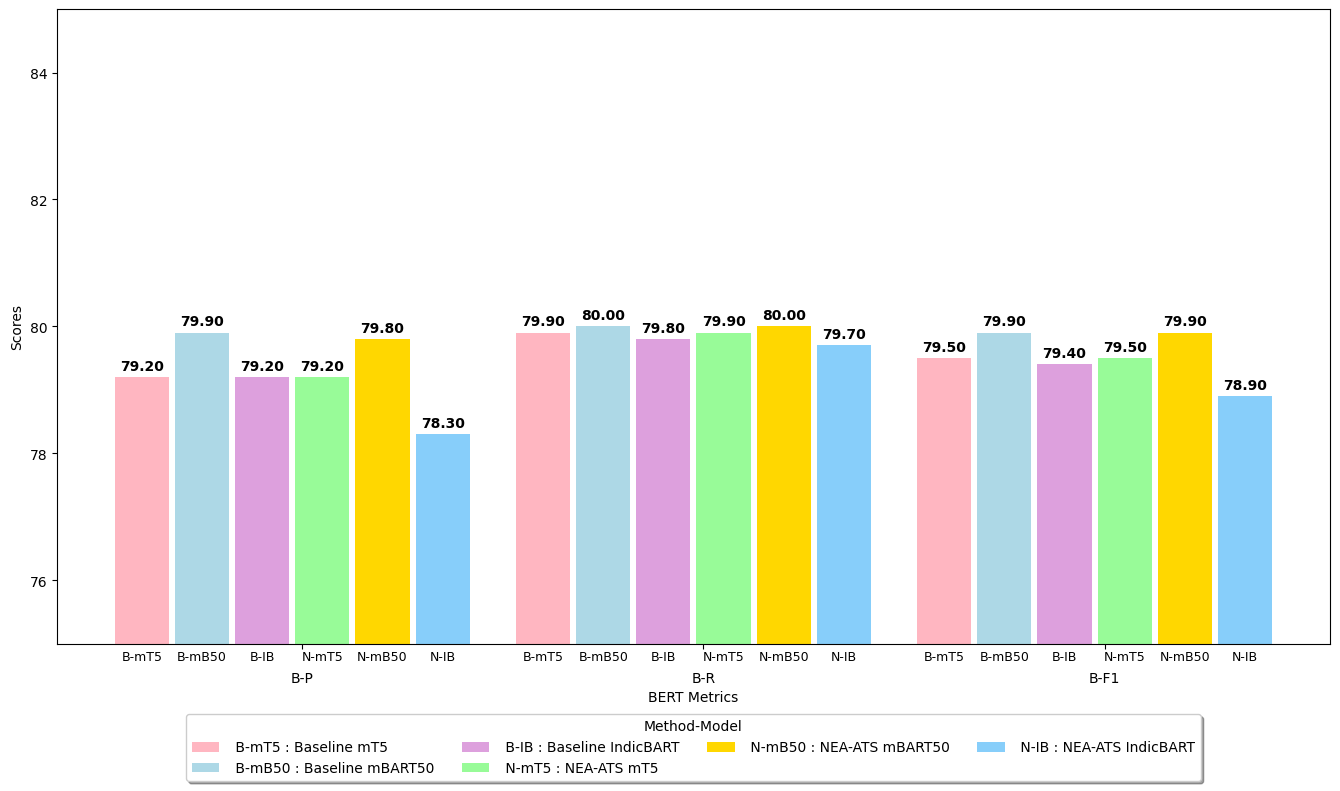

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the table
data_n = {
    "Method": ["Baseline", "Baseline", "Baseline", "NEA-ATS", "NEA-ATS", "NEA-ATS"],
    "Model": ["mT5", "mBART50", "IndicBART", "mT5", "mBART50", "IndicBART"],
    "Model-short": ['B-mT5', 'B-mB50', 'B-IB', 'N-mT5', 'N-mB50', 'N-IB'],
    "colors" : ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#98FB98', '#FFD700', '#87CEFA'],
    "R-1": [50.39, 49.96, 50.09, 50.25, 50.11, 49.07],
    "R-2": [38.18, 37.11, 37.93, 37.96, 37.19, 36.80],
    "R-L": [46.11, 45.05, 45.79, 45.88, 45.14, 44.67],
    "B-P": [79.2, 79.9, 79.2, 79.2, 79.8, 78.3],
    "B-R": [79.9, 80.0, 79.8, 79.9, 80.0, 79.7],
    "B-F1": [79.5, 79.9, 79.4, 79.5, 79.9, 78.9]
}

data_m = {
    "Method": ["Baseline", "Baseline", "Baseline", "NEA-ATS", "NEA-ATS", "NEA-ATS", "MLM"],
    "Model": ["mT5", "mBART50", "IndicBART", "mT5", "mBART50", "IndicBART", "IndicBART"],
    "Model-short": ['B-mT5', 'B-mB50', 'B-IB', 'N-mT5', 'N-mB50', 'N-IB', 'M-IB'],
    "colors" : ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#98FB98', '#FFD700', '#87CEFA', '#FFA07A'],
    "R-1": [50.39, 49.96, 50.09, 50.25, 50.11, 49.07, 50.11],
    "R-2": [38.18, 37.11, 37.93, 37.96, 37.19, 36.80, 37.78],
    "R-L": [46.11, 45.05, 45.79, 45.88, 45.14, 44.67, 45.76],
    "B-P": [79.2, 79.9, 79.2, 79.2, 79.8, 78.3, 79.4],
    "B-R": [79.9, 80.0, 79.8, 79.9, 80.0, 79.7, 79.8],
    "B-F1": [79.5, 79.9, 79.4, 79.5, 79.9, 78.9, 79.5]
}

data_q = {
    "Method": ["Baseline", "Baseline", "Baseline", "QDCAS", "QDCAS"],
    "Model": ["mT5", "mBART50", "IndicBART", "mLongT5-4096", "mLongT5-8192"],
    "Model-short": ['B-mT5', 'B-mB50', 'B-IB', 'Q-4096', 'Q-8192'],
    "colors" : ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#FFC0CB', '#FF69B4'],
    "R-1": [50.39, 49.96, 50.09, 50.60, 50.60],
    "R-2": [38.18, 37.11, 37.93, 38.38, 38.58],
    "R-L": [46.11, 45.05, 45.79, 46.17, 46.24],
    "B-P": [79.2, 79.9, 79.2, 79.6, 79.6],
    "B-R": [79.9, 80.0, 79.8, 80.4, 80.3],
    "B-F1": [79.5, 79.9, 79.4, 80.0, 79.9]
}


data_fin = {
    "Method": ["NEA-ATS", "NEA-ATS", "NEA-ATS", "MLM", "QDCAS", "QDCAS"],
    "Model": ["mT5", "mBART50", "IndicBART", "IndicBART", "mLongT5-4096", "mLongT5-8192"],
    "Model-short": ['N-mT5', 'N-mB50', 'N-IB', 'M-IB', 'Q-4096', 'Q-8192'],
    "colors" : ['#98FB98', '#FFD700', '#87CEFA', '#FFA07A', '#FFC0CB', '#FF69B4'],
    "R-1": [50.25, 50.11, 49.07, 50.11, 50.60, 50.60],
    "R-2": [37.96, 37.19, 36.80, 37.78, 38.38, 38.58],
    "R-L": [45.88, 45.14, 44.67, 45.76, 46.17, 46.24],
    "B-P": [79.2, 79.8, 78.3, 79.4, 79.6, 79.6],
    "B-R": [79.9, 80.0, 79.7, 79.8, 80.4, 80.3],
    "B-F1": [79.5, 79.9, 78.9, 79.5, 80.0, 79.9]
}


# Create DataFrame
df = pd.DataFrame(data_n)

def create_final_adjusted_bar_plot(metrics, custom_min=40, custom_max=60):
    # Number of groups and models/methods
    n_groups = len(metrics)
    models_methods = len(df)

    # Create plot
    fig, ax = plt.subplots(figsize=(13.5, 8))

    # Setting the positions and width for the bars
    total_width = 0.9
    single_width = total_width / models_methods
    bar_width = single_width * 0.9  # width of each bar
    group_spacing = 0.10  # further reduced space between groups of bars for each metric

    # Colors (light shades)
    
    # Iterate over all metrics
    for i, metric in enumerate(metrics):
        # Create an offset for each metric group, with reduced spacing for clear separation
        group_offset = (total_width + group_spacing) * i
        
        # Plot bars for each model-method combination within each metric group
        for j in range(models_methods):
            means = df.loc[j, metric]
            pos = j * single_width + group_offset
            bar = plt.bar(pos, means, bar_width, color=df.loc[j, "colors"], label=f' {df.loc[j, "Model-short"]} : {df.loc[j, "Method"]} {df.loc[j, "Model"]}' if i == 0 else "")
            # Add text annotation above each bar
            for rect in bar:
                height = rect.get_height()
                ax.annotate(f'{height:.2f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontweight='bold')
                # Add M1, M2, M3... labels below each bar for identification
                ax.text(rect.get_x() + rect.get_width() / 2, custom_min - (custom_max-custom_min)*0.01, df.loc[j, "Model-short"], ha='center', va='top', fontsize=9)

    # Set x-axis labels to be in the middle of the groups and use Times New Roman
    plt.xlabel('BERT Metrics')
    plt.ylabel('Scores')
    ax.set_xticks([i * (total_width + group_spacing) + (total_width / 2) - (group_spacing / 2) for i in range(n_groups)])
    ax.set_xticklabels(metrics, verticalalignment='bottom', y=-0.05)
    
    
    # Adjust the y-axis to start from a custom value (e.g., custom_min) and end at custom_max
    ax.set_ylim([custom_min, custom_max])
    
    # Adding legend with Times New Roman
    plt.legend(title="Method-Model", loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
    
    plt.tight_layout()
    plt.savefig("lsn-bert-nea-ats.png")

# Uncomment below to create and display the plots for both ROUGE and BERT scores
create_final_adjusted_bar_plot(["B-P", "B-R", "B-F1"], custom_min=75, custom_max=85)


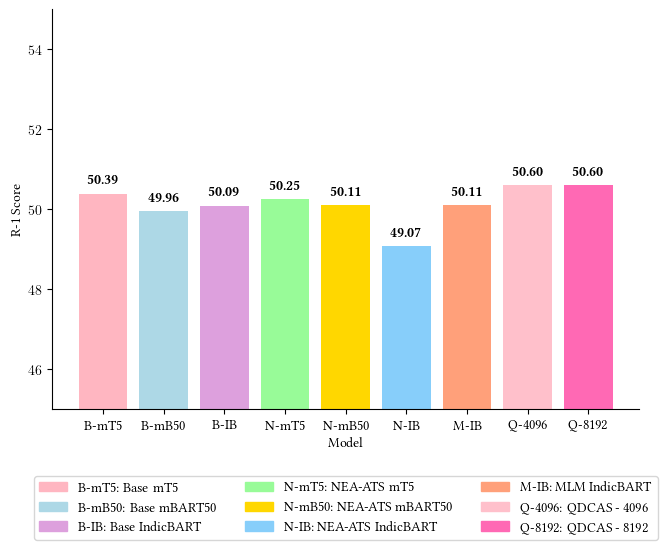

In [33]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Linux Libertine O"],
    "text.latex.preamble": r"\usepackage{libertine}"
})
plt.rcParams['font.size'] = 10

# Sample data: R-1 scores and model names
r1_scores = [50.39, 49.96, 50.09, 50.25, 50.11, 49.07, 50.11, 50.60, 50.60]
model_short_names = ['B-mT5', 'B-mB50', 'B-IB', 'N-mT5', 'N-mB50', 'N-IB', 'M-IB', 'Q-4096', 'Q-8192']
model_full_names = [
    'Base mT5', 'Base mBART50', 'Base IndicBART', 'NEA-ATS mT5', 
    'NEA-ATS mBART50', 'NEA-ATS IndicBART', 'MLM IndicBART', 'QDCAS - 4096', 'QDCAS - 8192'
]

# Light colors for each bar and a distinct color for the rightmost bar
colors = ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#98FB98', '#FFD700', '#87CEFA', '#FFA07A', '#FFC0CB', '#FF69B4']

# Create a bar graph with increased figure size
fig, ax = plt.subplots(figsize=(7, 6))  # Adjust the figure size here

# Adjust the width of the bars to increase space between them
bars = ax.bar(model_short_names, r1_scores, color=colors, width=0.8)  # Adjust the width parameter

# Add the value labels on top of each bar in bold and with contrasting dark color
for bar in bars:
    height = bar.get_height()
    ax.annotate(r'\textbf{' + f'{height:.2f}' + '}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Vertical offset to 5 points
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', color='black')

# Create custom handles for the legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
legend_labels = [f'{short}: {full}' for short, full in zip(model_short_names, model_full_names)]
ax.set_ylim([45, 55])

# Add legend below the graph
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Remove the borders from all four sides except for the left and bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis labels and title
ax.set_xlabel('Model')
ax.set_ylabel('R-1 Score')

# Adjust layout to make room for the legend and top annotations
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.savefig("all-r1-lsn.png")


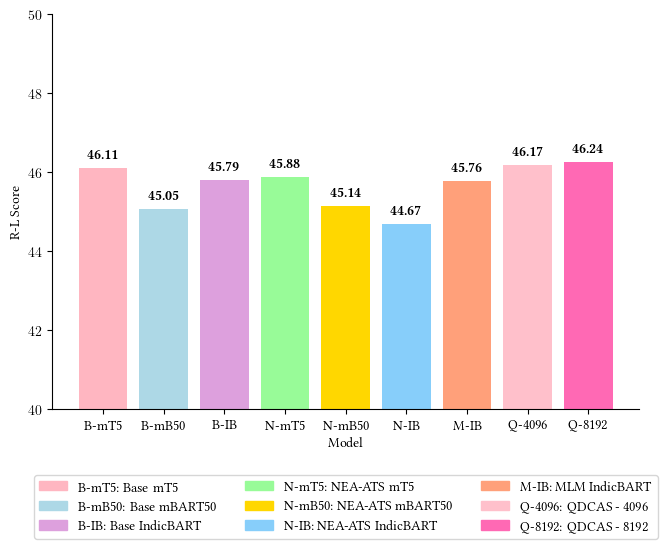

In [37]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Linux Libertine O"],
    "text.latex.preamble": r"\usepackage{libertine}"
})
plt.rcParams['font.size'] = 10

# Sample data: R-1 scores and model names
r1_scores = [46.11, 45.05, 45.79, 45.88, 45.14, 44.67, 45.76, 46.17, 46.24]
model_short_names = ['B-mT5', 'B-mB50', 'B-IB', 'N-mT5', 'N-mB50', 'N-IB', 'M-IB', 'Q-4096', 'Q-8192']
model_full_names = [
    'Base mT5', 'Base mBART50', 'Base IndicBART', 'NEA-ATS mT5', 
    'NEA-ATS mBART50', 'NEA-ATS IndicBART', 'MLM IndicBART', 'QDCAS - 4096', 'QDCAS - 8192'
]

# Light colors for each bar and a distinct color for the rightmost bar
colors = ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#98FB98', '#FFD700', '#87CEFA', '#FFA07A', '#FFC0CB', '#FF69B4']

# Create a bar graph with increased figure size
fig, ax = plt.subplots(figsize=(7, 6))  # Adjust the figure size here

# Adjust the width of the bars to increase space between them
bars = ax.bar(model_short_names, r1_scores, color=colors, width=0.8)  # Adjust the width parameter

# Add the value labels on top of each bar in bold and with contrasting dark color
for bar in bars:
    height = bar.get_height()
    ax.annotate(r'\textbf{' + f'{height:.2f}' + '}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Vertical offset to 5 points
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', color='black')

# Create custom handles for the legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
legend_labels = [f'{short}: {full}' for short, full in zip(model_short_names, model_full_names)]
ax.set_ylim([40, 50])

# Add legend below the graph
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Remove the borders from all four sides except for the left and bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis labels and title
ax.set_xlabel('Model')
ax.set_ylabel('R-L Score')

# Adjust layout to make room for the legend and top annotations
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.savefig("all-rl-lsn.png")


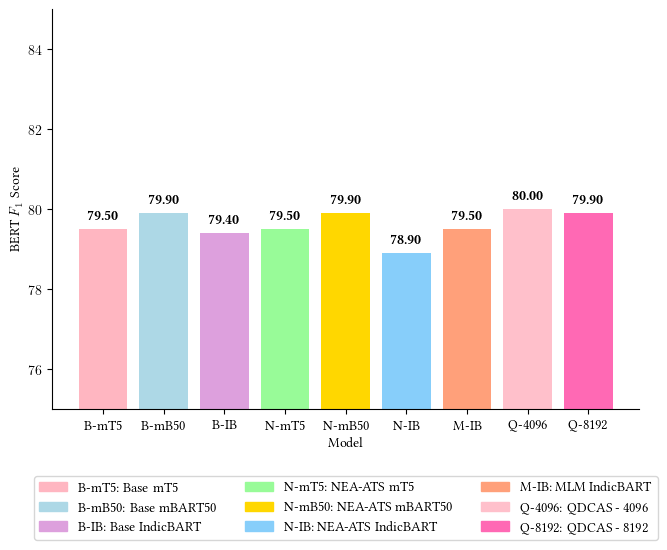

In [35]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Linux Libertine O"],
    "text.latex.preamble": r"\usepackage{libertine}"
})
plt.rcParams['font.size'] = 10

# Sample data: R-1 scores and model names
r1_scores = [79.5, 79.9, 79.4, 79.5, 79.9, 78.9, 79.5, 80.0, 79.9]
model_short_names = ['B-mT5', 'B-mB50', 'B-IB', 'N-mT5', 'N-mB50', 'N-IB', 'M-IB', 'Q-4096', 'Q-8192']
model_full_names = [
    'Base mT5', 'Base mBART50', 'Base IndicBART', 'NEA-ATS mT5', 
    'NEA-ATS mBART50', 'NEA-ATS IndicBART', 'MLM IndicBART', 'QDCAS - 4096', 'QDCAS - 8192'
]

# Light colors for each bar and a distinct color for the rightmost bar
colors = ['#FFB6C1', '#ADD8E6', '#DDA0DD', '#98FB98', '#FFD700', '#87CEFA', '#FFA07A', '#FFC0CB', '#FF69B4']

# Create a bar graph with increased figure size
fig, ax = plt.subplots(figsize=(7, 6))  # Adjust the figure size here

# Adjust the width of the bars to increase space between them
bars = ax.bar(model_short_names, r1_scores, color=colors, width=0.8)  # Adjust the width parameter

# Add the value labels on top of each bar in bold and with contrasting dark color
for bar in bars:
    height = bar.get_height()
    ax.annotate(r'\textbf{' + f'{height:.2f}' + '}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Vertical offset to 5 points
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', color='black')

# Create custom handles for the legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
legend_labels = [f'{short}: {full}' for short, full in zip(model_short_names, model_full_names)]
ax.set_ylim([75, 85])

# Add legend below the graph
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Remove the borders from all four sides except for the left and bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis labels and title
ax.set_xlabel('Model')
ax.set_ylabel(r'BERT $F_1$ Score')

# Adjust layout to make room for the legend and top annotations
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.savefig("all-bf1-lsn.png")


In [19]:
from transformers import AutoTokenizer, AutoModel
import torch
from scipy.spatial.distance import cosine
from tqdm import tqdm
import json
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def plot_retrieval_efficiency_histogram(dataset_names, retrieval_data):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Linux Libertine O"],
        "text.latex.preamble": r"\usepackage{libertine}"
    })
    plt.rcParams['font.size'] = 10
    fig, axes = plt.subplots(1, len(dataset_names), figsize=(15, 6), sharey=True)

    if len(dataset_names) == 1:
        axes = [axes]

    for ax, data, name in zip(axes, retrieval_data, dataset_names):
        sns.histplot(data, bins=range(0, max(data)+1), kde=False, ax=ax)
        ax.set_title(f'Retrieval Efficiency for {name}')
        ax.set_xlabel('Number of Documents Retrieved')
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig("doc-freq.png")

def calculate_retrieval_efficiency(file_path):
    retrieval_counts = []
    with open(file_path, 'rb') as file:
        for line in tqdm(file):
            rec = json.loads(line)
            retrieval_counts.append(len(rec['data']))
    average_retrieval = sum(retrieval_counts) / len(retrieval_counts) if retrieval_counts else 0
    return retrieval_counts, average_retrieval

16980it [00:15, 1086.96it/s]


File: Datasets/Hindi_summarization/ILSUM2023/ILSUM2023-train-crawl-clear.jsonl
Average Number of Documents Retrieved: 5.33



70778it [01:22, 857.88it/s] 


File: Datasets/Hindi_summarization/XLSum/XLSum-train-crawl-clear.jsonl
Average Number of Documents Retrieved: 3.91



58084it [00:39, 1462.66it/s] 


File: Datasets/Hindi_summarization/Long-short-news-dataset/LSN-train-crawl-clear.jsonl
Average Number of Documents Retrieved: 4.51



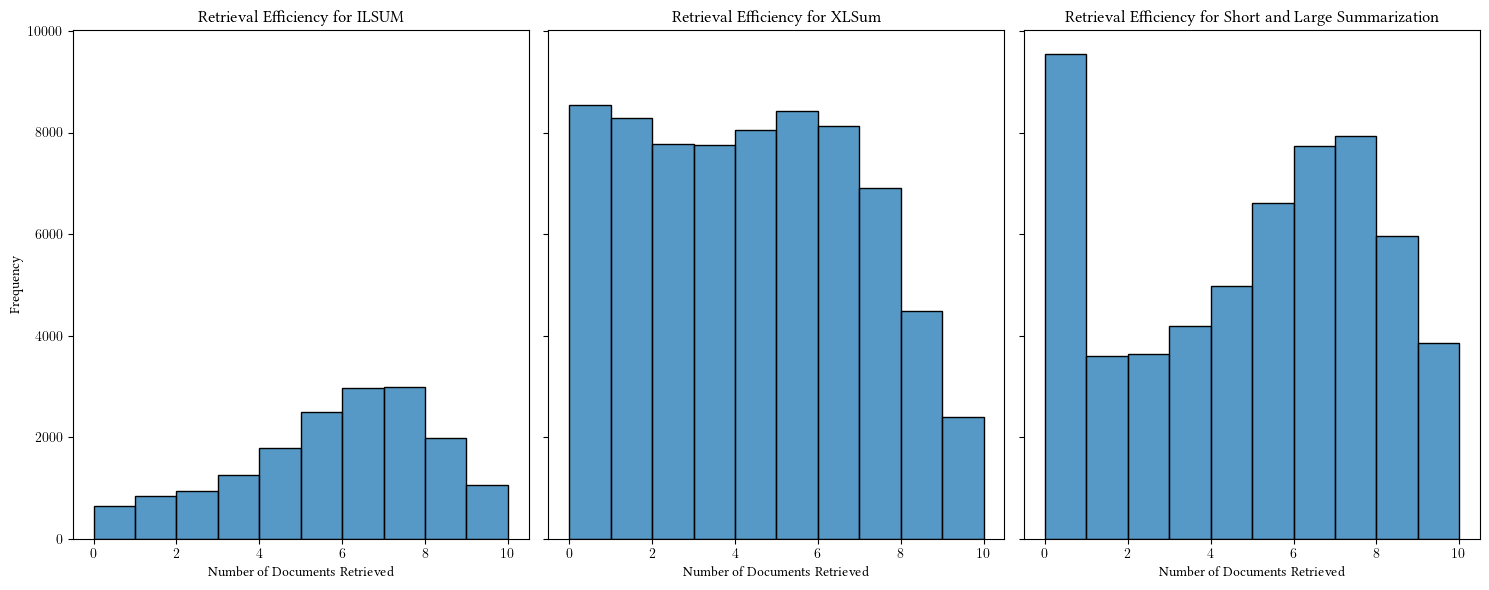

In [24]:
dataset_files = ["Datasets/Hindi_summarization/ILSUM2023/ILSUM2023-train-crawl-clear.jsonl",
                 "Datasets/Hindi_summarization/XLSum/XLSum-train-crawl-clear.jsonl",
                 "Datasets/Hindi_summarization/Long-short-news-dataset/LSN-train-crawl-clear.jsonl"]
dataset_names = ["ILSUM", "XLSum", "Short and Large Summarization"]
retrieval_data = []

for file in dataset_files:
    retrieval_counts, average_retrieval = calculate_retrieval_efficiency(file)
    print(f"File: {file}")
    print(f"Average Number of Documents Retrieved: {average_retrieval:.2f}\n")
    retrieval_data.append(retrieval_counts)

plot_retrieval_efficiency_histogram(dataset_names, retrieval_data)

In [27]:
def read_scores(file_path):
    score_list = []
    with open(file_path, 'rb') as file:
        for line in tqdm(file, desc=f'Reading {file_path}'):
            rec = json.loads(line)
            data = rec['data']
            for article in data:
              score_list.append(article['score'])
    return score_list

def cosine_scores(df_crawl):
    score_list = []

    for item in tqdm(df_crawl.values(), desc=f'Calculating cosine'):
        for article in item:
            score_list.append(article['score'])

    return score_list

def plot_cosine_similarity_distribution(dataset_names, cosine_data):
    # Update matplotlib rcParams for LaTeX text rendering with Libertine font
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Linux Libertine O"],
        "text.latex.preamble": r"\usepackage{libertine}"
    })
    plt.rcParams['font.size'] = 10

    fig, axes = plt.subplots(1, len(dataset_names), figsize=(15, 6), sharey=True)

    if len(dataset_names) == 1:
        axes = [axes]

    for ax, data, name in zip(axes, cosine_data, dataset_names):
        sns.histplot(data, bins=50, kde=True, ax=ax)
        ax.set_title(f'Cosine Similarity Distribution for {name}')
        ax.set_xlabel('Cosine Similarity Score')
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig("cosine-same.png")

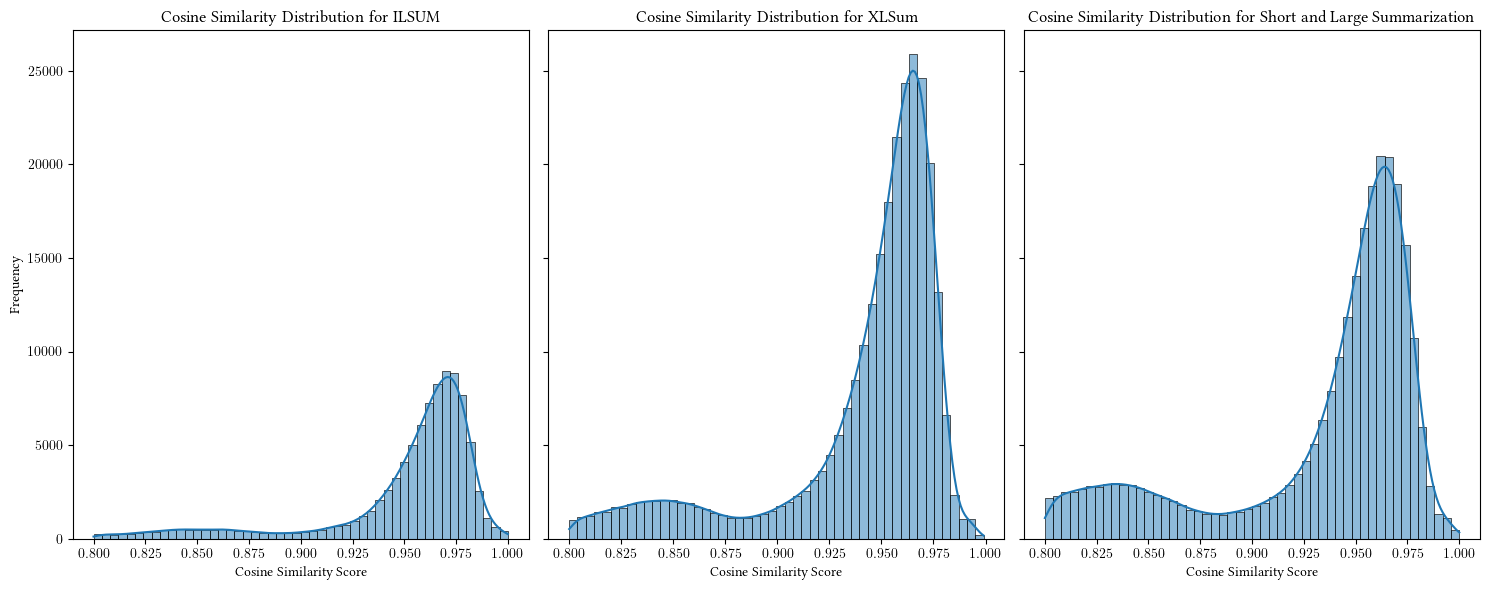

In [28]:
# crawl_dataset_files = ["Datasets/Hindi_summarization/ILSUM2023/ILSUM2023-train-crawl-clear.jsonl",
#                  "Datasets/Hindi_summarization/XLSum/XLSum-train-crawl-clear.jsonl",
#                  "Datasets/Hindi_summarization/Long-short-news-dataset/LSN-train-crawl-clear.jsonl"]
# dataset_names = ["ILSUM", "XLSum", "Short and Large Summarization"]

# cosine_data = []

# for i, file in enumerate(crawl_dataset_files):
#     cosine_score = read_scores(file)
#     # cosine_score = cosine_scores(crawl_data)
#     print(f"File: {file}")
#     print(f"Average Cosine Similarity: {sum(cosine_score) / len(cosine_score):.2f}\n")
#     cosine_data.append(cosine_score)

plot_cosine_similarity_distribution(dataset_names, cosine_data)